# Exploratory Data Analysis (EDA)



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("F:\\AssignmentTerotam\\DATA\\PROCESSED\\terrorism_cleaned.csv",encoding = 'latin1')
df.head()


,year,month,day,country,region,city,attack_type,target_type,weapon_type,group_name,kill,wound,date
0,1970,7.0,2.0,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Unknown,MANO-D,1.0,0.0,1970-07-02
1,1970,NaN,NaN,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,0.0,0.0,NaN
2,1970,1.0,NaN,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,NaN
3,1970,1.0,NaN,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,0.0,0.0,NaN
4,1970,1.0,NaN,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,0.0,0.0,NaN


## Trend of Terrorist Attacks Over Years
This analysis identifies how terrorist activities have changed over time.


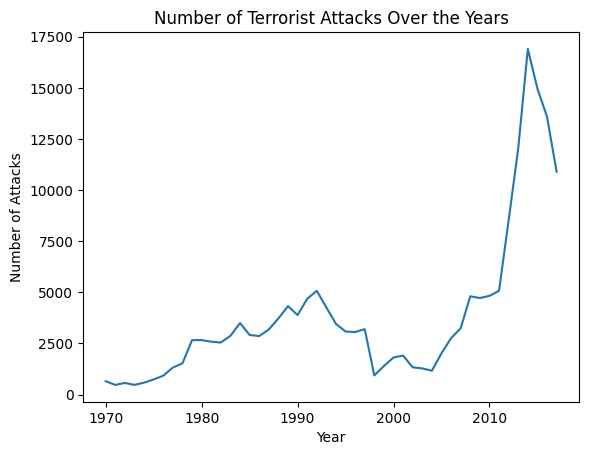

In [47]:
attacks_per_year = df['year'].value_counts().sort_index()

plt.figure()
attacks_per_year.plot()
plt.title("Number of Terrorist Attacks Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\attack_over_years.png", dpi=300, bbox_inches = 'tight')
plt.show()

### Key Findings
- Terrorist attacks increased sharply after 2010.
- After the peak period, attacks show a gradual decline.


## Top 10 Most Affected Countries


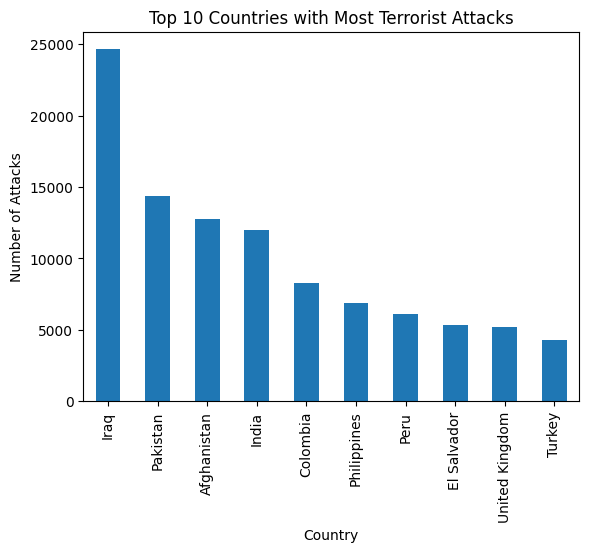

In [48]:
top_countries = df['country'].value_counts().head(10)

plt.figure()
top_countries.plot(kind='bar')
plt.title("Top 10 Countries with Most Terrorist Attacks")
plt.xlabel("Country")
plt.ylabel("Number of Attacks")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\top_10_countries_attacks.png", bbox_inches="tight")
plt.show()

### Key Findings
- A small number of countries(Iraq, Pakistan, Afghanistan, etc...)account for most terrorist attacks.
- These countries face long-term security challenges.
- Attacks are not evenly distributed across the world.


## Top 10 Deadliest Countries
Focuses on impact, not frequency

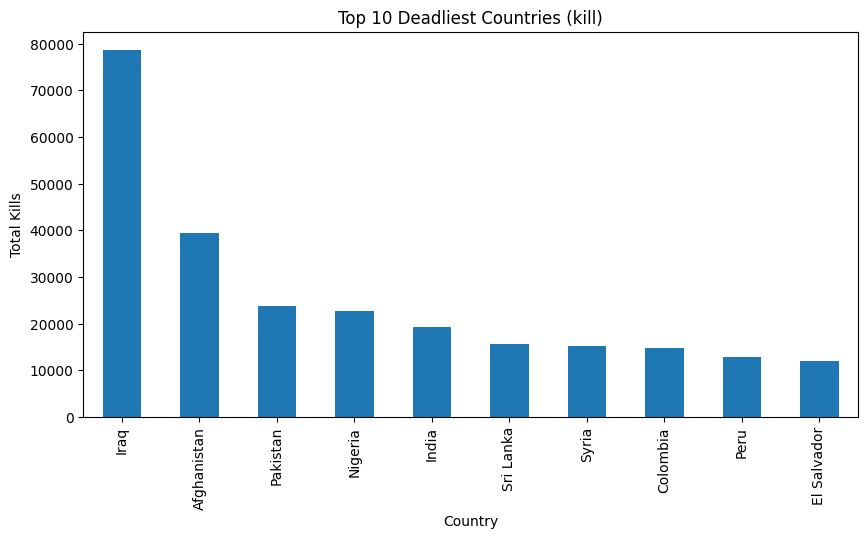

In [36]:
deadliest_countries = df.groupby('country')['kill'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
deadliest_countries.plot(kind='bar')
plt.title("Top 10 Deadliest Countries (kill)")
plt.xlabel("Country")
plt.ylabel("Total Kills")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\top_10_deadliest_countries.png", bbox_inches="tight")
plt.show()


### Key Findings

- Iraq has the highest number of kills, showing it is the most affected country by terrorism.
- Afghanistan and Pakistan also report very high kills, indicating long-term conflict situations.
- India appears among the top countries, showing terrorism has caused significant human loss.
- Some countries with fewer attacks still have high kills, meaning attacks there are more deadly.
- The kills are highly concentrated in a few countries rather than being evenly spread worldwide.


## Attack Type Distribution


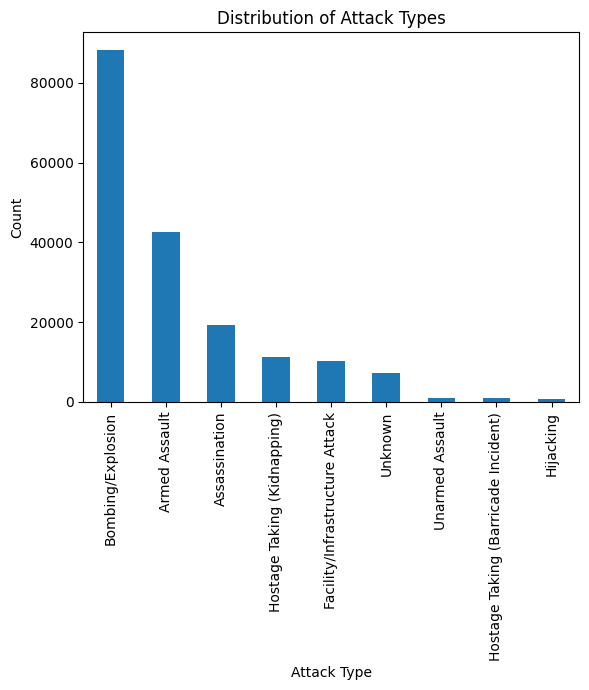

In [49]:
attack_types = df['attack_type'].value_counts()

plt.figure()
attack_types.plot(kind='bar')
plt.title("Distribution of Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\attack_type_distribution.png", bbox_inches="tight")
plt.show()

### Key Findings

- Bombing and explosion is the most common attack type, used far more than others.
- Armed assault is the second most frequent method, showing high use of direct violence.
- Other attack types like hijacking and unarmed assault are very rare compared to major attack methods.


## Weapon Types Used in Attacks


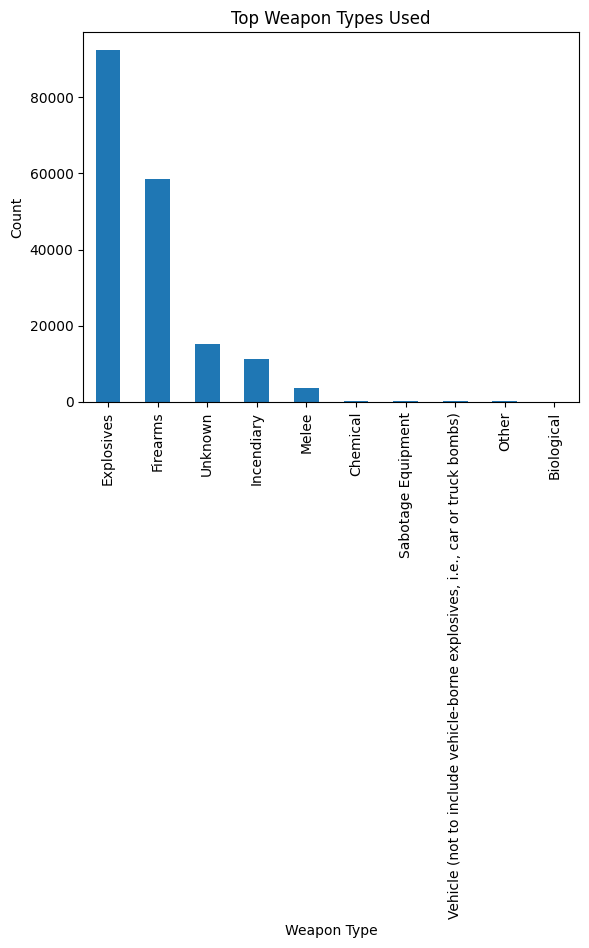

In [50]:
weapon_types = df['weapon_type'].value_counts().head(10)

plt.figure()
weapon_types.plot(kind='bar')
plt.title("Top Weapon Types Used")
plt.xlabel("Weapon Type")
plt.ylabel("Count")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\weapon_type_in_attacks.png", bbox_inches="tight")
plt.show()

### Key Findings

- Explosives are the most commonly used weapons in terrorist attacks.
- Firearms are the second most used weapon type, showing frequent direct attacks.
- Other weapons like chemical or biological are used very rarely.


## Impact Analysis: Kills and Injuries


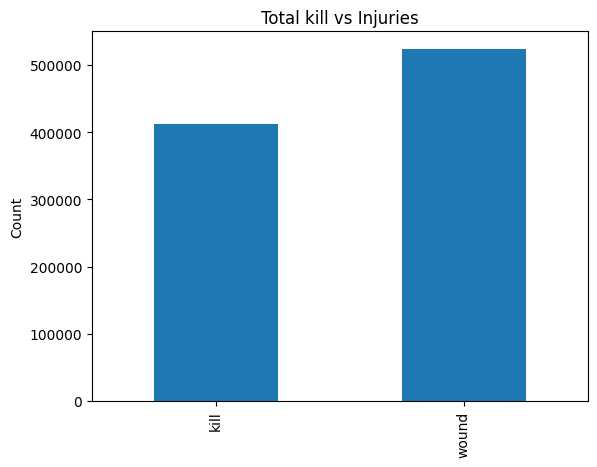

In [51]:
df[['kill', 'wound']].sum().plot(kind='bar')
plt.title("Total kill vs Injuries")
plt.ylabel("Count")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\impact_analysis_in_kills_injuires.png", bbox_inches="tight")
plt.show()

### Key Findings

- The total number of injuries is higher than the total number of kills.
- This shows that many attacks injure people even when they do not cause deaths.
- Terrorist attacks have a large human impact beyond just kills.


## Region-wise Terrorist Activity


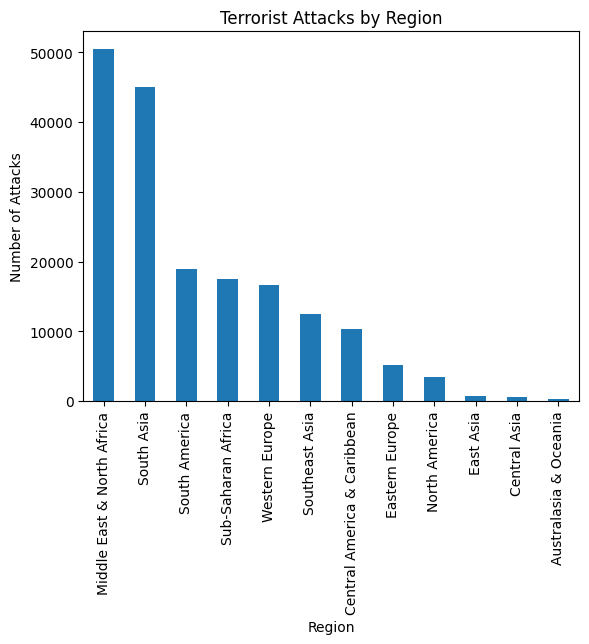

In [52]:
region_attacks = df['region'].value_counts()

plt.figure()
region_attacks.plot(kind='bar')
plt.title("Terrorist Attacks by Region")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\Terrorist_attack_by_region.png", bbox_inches="tight")
plt.show()

### Key Findings:

- Middle East & North Africa has the highest number of terrorist attacks.
- South Asia is the second most affected region, showing long-term security issues.
- Regions like Australasia & Oceania and Central Asia report very few attacks.


## Year-wise Terrorist Attacks by Region

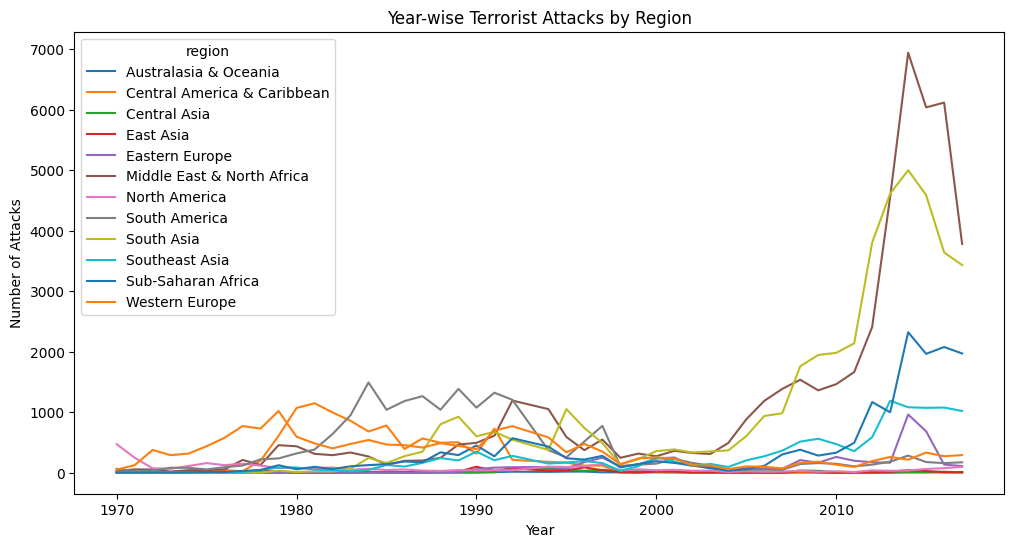

In [20]:
plt.figure(figsize=(12,6))

region_year = df.groupby(['year', 'region']).size().unstack().fillna(0)

region_year.plot(ax=plt.gca())
plt.title("Year-wise Terrorist Attacks by Region")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\yearly_attacks_by_region.png", bbox_inches="tight")
plt.show()


### Key Findings

- Terrorist attacks increased sharply after 2010 in multiple regions.
- Middle East & North Africa shows the highest rise during peak years.
- Some regions show a decline after peak periods, indicating improved control.


## Heatmap: Attacks by Month & Year

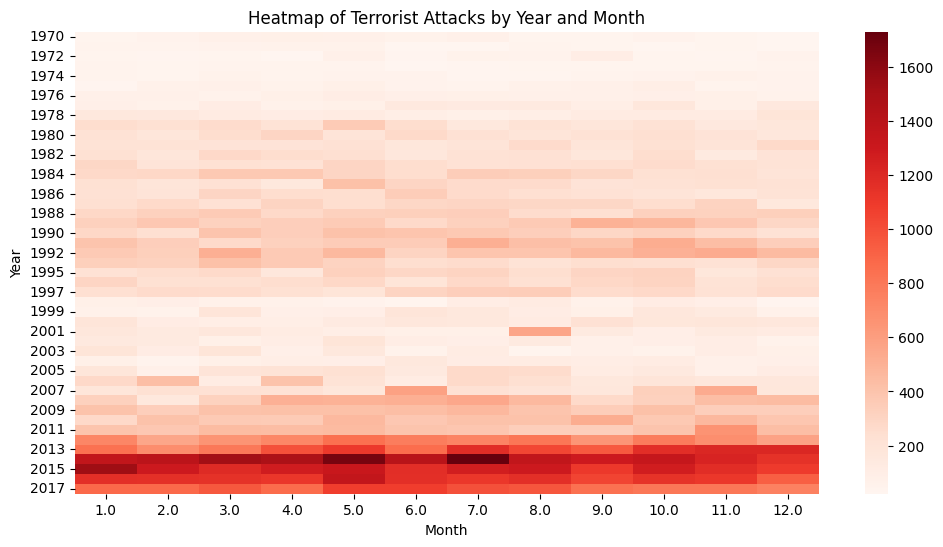

In [53]:
heatmap_data = df.groupby(['year', 'month']).size().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Reds')
plt.title("Heatmap of Terrorist Attacks by Year and Month")
plt.xlabel("Month")
plt.ylabel("Year")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\attacks_year_month_heatmap.png", bbox_inches="tight")
plt.show()


### Key Findings

- Terrorist attacks increased significantly after 2010 across almost all months.
- No single month consistently dominates, showing attacks happen throughout the year.
- Peak years show high activity in many months, not just in a specific season.


## Attack Type vs Kills

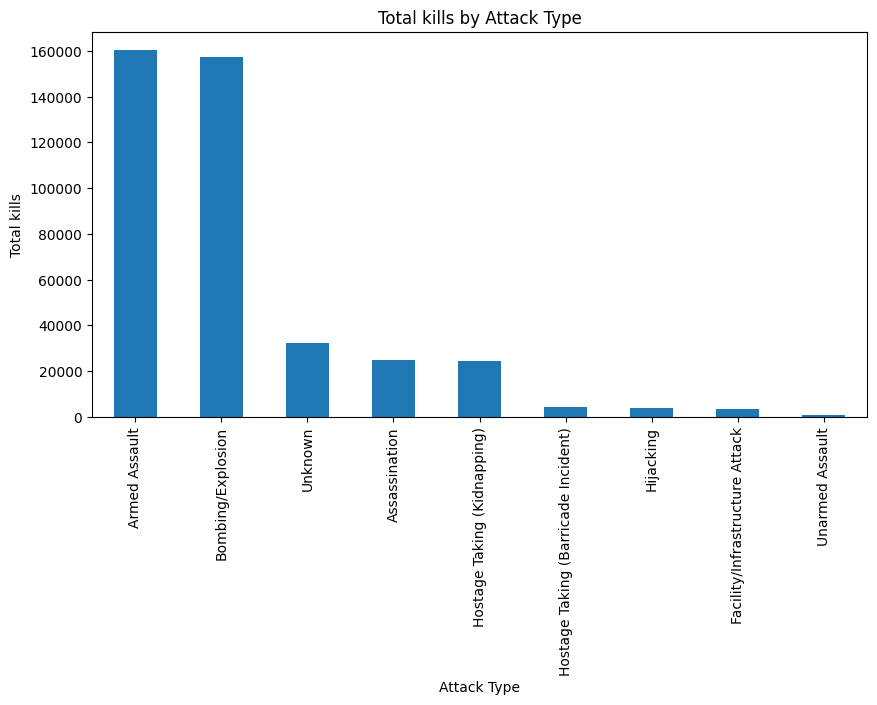

In [42]:
attack_kills = df.groupby('attack_type')['kill'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
attack_kills.plot(kind='bar')
plt.title("Total kills by Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Total kills")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\Kills_by_attack_type.png", bbox_inches="tight")
plt.show()


### Key Findings

- Armed assault and bombing/explosion cause the highest number of kills.
- These attack types are extremely dangerous due to direct and large-scale impact.
- Other attack types contribute much fewer kills in comparison.


## Terrorist Groups Impact Analysis

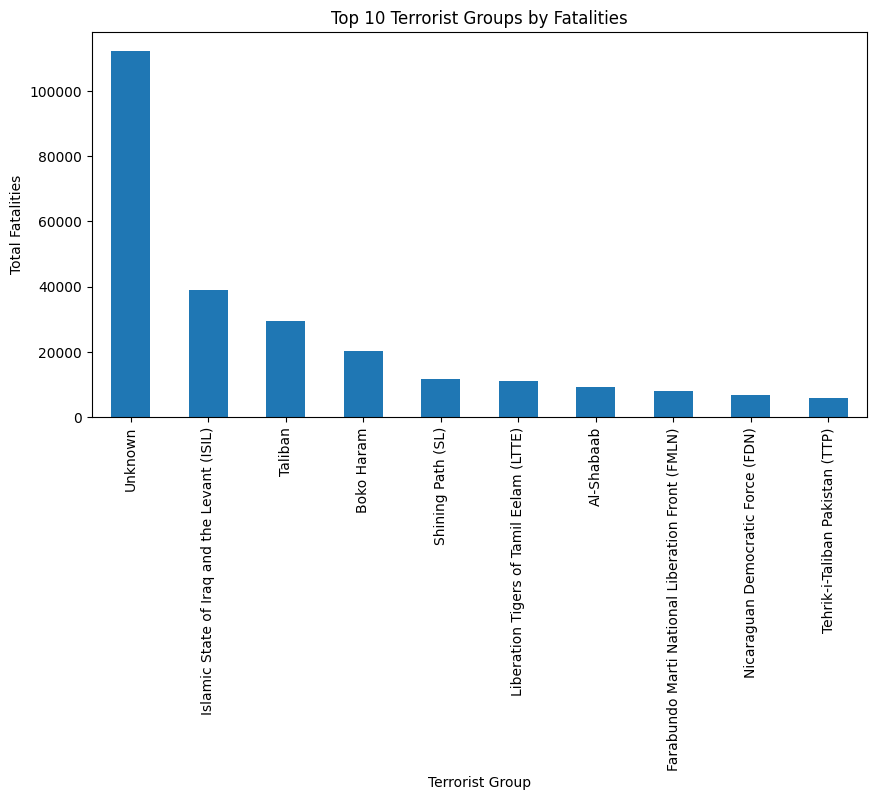

In [ ]:
top_groups_impact = df.groupby('group_name')['kill'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_groups_impact.plot(kind='bar')
plt.title("Top 10 Terrorist Groups by Kills")
plt.xlabel("Terrorist Group")
plt.ylabel("Total Fatalities")

plt.savefig("F:\\AssignmentTerotam\\VISUALS\\top_groups_by_Kills.png", bbox_inches="tight")
plt.show()


### Key Findings

- A large number of kills are linked to attacks where the terrorist group is unknown.
- Groups like ISIL and Taliban are among the deadliest known terrorist organizations.
- A small number of groups are responsible for a large share of total kills.
